In [33]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist

In [34]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()
train_images=train_images/255.0
test_images= test_images/255.0

In [35]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [36]:
model.compile( optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [37]:
train_images= train_images.reshape((60000,28,28,1))
test_images= test_images.reshape((10000,28,28,1))

In [38]:
history=model.fit(train_images,train_labels,epochs=10,validation_data=(test_images,test_labels))

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.4977 - accuracy: 0.8165 - val_loss: 0.4027 - val_accuracy: 0.8591
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3214 - accuracy: 0.8834 - val_loss: 0.3232 - val_accuracy: 0.8822
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2723 - accuracy: 0.8998 - val_loss: 0.2858 - val_accuracy: 0.8979
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2418 - accuracy: 0.9100 - val_loss: 0.2705 - val_accuracy: 0.9022
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2156 - accuracy: 0.9202 - val_loss: 0.2616 - val_accuracy: 0.9054
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1970 - accuracy: 0.9266 - val_loss: 0.2860 - val_accuracy: 0.8973
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1816 - accuracy: 0.9317 - val_loss: 0.2628 - val_accurac

In [39]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 1s 3ms/step - loss: 0.2864 - accuracy: 0.9088
Test accuracy: 0.9088000059127808


In [40]:
import matplotlib.pyplot as plt


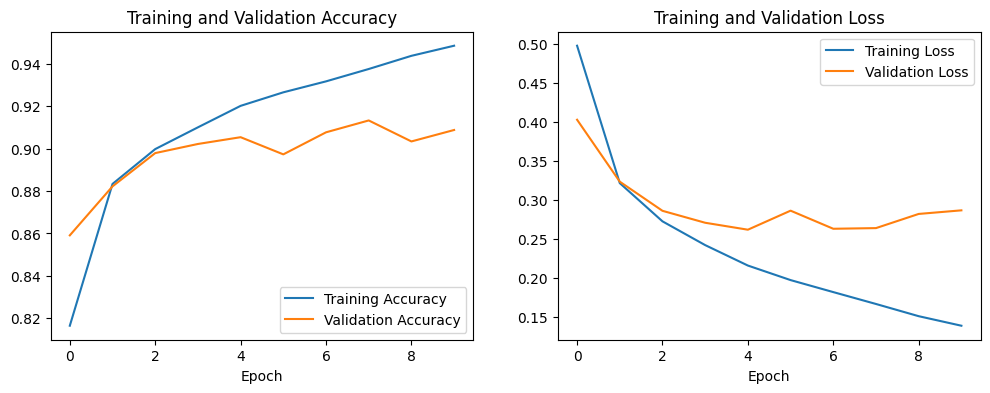

In [41]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.show()